In [1]:
## Importing the necessary libraries
## Making sure that the plots appear right nelow the code in notebook itself
## adjusting the size of matplotlib plots to a certain value
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
## Reading the data, converting it to a dataframe, assigning it a name and  viewing it
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
## Seeing the rows and columns of the dataset
df1.shape

(13320, 9)

In [4]:
## examining the areatype by printing the count of each category in areatype
## basically we will use the groupby feature to examine the dataset
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
## we will drop the unnecessary columns that not really dictates the house prices
df2 = df1.drop(['area_type','availability','society'],axis='columns')

In [6]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
## we will see the number of null functions
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
## now we have 2 options - 1) drop those rows if sample size is huge compared to null rows 
## 2) finding the median of values and filling the null values
## we will do the first option by dropping the null rows
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [9]:
## now we will examine the size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [10]:
## so we see that it is in 2 formats - N BHK and N Bedroom. our target is N. so we will create a new column containing N
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\hp\AppData\Local\Temp\ipykernel_10132\1740093600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
df3

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [12]:
## so we have got the bhk column. now we will drop the size column which we no longer need
df4 = df3.drop(['size'],axis='columns')

In [13]:
df4

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715,3.0,3.0,112.00,3
13315,Whitefield,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689,4.0,1.0,488.00,4


In [14]:
## we will examine the bhk column
df4['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [15]:
## we want to see the data which have more than 20 bhk
df4[df4['bhk']>20]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [16]:
## we will explore the total_sqft column
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
## we see that sometime we get a range .we will see that if a number is float or not
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df4[~df4['total_sqft'].apply(isfloat)]

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [19]:
## so we will have to eliminate the range and put the average of those 2 numbers
def convert_range_to_average(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
## now we will apply the conversion function to the column
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_to_average)
df4

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [21]:
## now we will do feature engineering and dimensionality reduction techniques
df5 = df4.copy()

In [22]:
df5

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [23]:
## now we know that price per sqft is a very necassary parameter. we will create that parameter
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [24]:
df5

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [25]:
## seeing how many location do we have
len(df5['location'].unique())

1265

In [26]:
## there are 1265 locations. usually to handle text data we convert it to dummy columns. now if we do it, it means 
## that we are to create 1265 columns which is a huge number. so we have to do dimensionality reduction. in this method,
## if there are 1-2-3 datapoints for a location we will convert the location name to 'other location'. in this way,
## it will dimensionality reduction.

In [27]:
## counting the datapoints of each location and then sort it in ascending order using sort_values function
location_count = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_count

location
Whitefield              514
Sarjapur  Road          372
Electronic City         300
Kanakpura Road          261
Thanisandra             231
                       ... 
Kalhalli                  1
Kalkere Channasandra      1
 Banaswadi                1
Kamdhenu Nagar            1
whitefiled                1
Name: location, Length: 1265, dtype: int64

In [28]:
## so any location which is less than 10 locations is to be names 'other location'
len(location_count[location_count<10])

1018

In [29]:
location_count_lessthan10 = location_count[location_count<10]
location_count_lessthan10

location
Banagiri Nagar          9
KUDLU MAIN ROAD         9
Chandra Layout          9
Nehru Nagar             9
B Narayanapura          9
                       ..
Kalhalli                1
Kalkere Channasandra    1
 Banaswadi              1
Kamdhenu Nagar          1
whitefiled              1
Name: location, Length: 1018, dtype: int64

In [30]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_count_lessthan10 else x )

In [31]:
df5

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [32]:
len(df5['location'].unique())

248

In [33]:
location_count_lessthan10

location
Banagiri Nagar          9
KUDLU MAIN ROAD         9
Chandra Layout          9
Nehru Nagar             9
B Narayanapura          9
                       ..
Kalhalli                1
Kalkere Channasandra    1
 Banaswadi              1
Kamdhenu Nagar          1
whitefiled              1
Name: location, Length: 1018, dtype: int64

In [34]:
df5.head(23)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.000000


In [35]:
## now we will do outlier detection and removal. outliers are either faulty data or extreme variation in data.
## it is necessary to reove the outliers to make a better model


In [36]:
## now we will make a column of squareft per bedroom
df5['sqft_per_bedroom'] = df5['total_sqft']/df5['bhk']

In [37]:
df5

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,528.000000
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615,650.000000
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,480.000000
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,507.000000
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,600.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245,571.666667
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926,690.600000
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136,570.500000
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319,1172.250000


In [38]:
## now we will find out the rows where sqft per bedroom is less than 300
df5[df5['sqft_per_bedroom']<300]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810,234.500000
68,other,1350.0,7.0,0.0,85.0,8,6296.296296,168.750000
70,other,500.0,3.0,2.0,100.0,3,20000.000000,166.666667
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696,230.000000
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268,118.333333
...,...,...,...,...,...,...,...,...
13219,Laggere,1590.0,9.0,3.0,132.0,7,8301.886792,227.142857
13221,other,1178.0,9.0,1.0,75.0,9,6366.723260,130.888889
13281,Margondanahalli,1375.0,5.0,1.0,125.0,5,9090.909091,275.000000
13303,Vidyaranyapura,774.0,5.0,3.0,70.0,5,9043.927649,154.800000


In [39]:
## we will make a new dataset where we will exclude the data where sqft per bedroom is less than 300
df6 = df5[~(df5['sqft_per_bedroom']<300)]

In [40]:
df6

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,528.000000
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615,650.000000
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,480.000000
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,507.000000
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,600.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245,571.666667
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926,690.600000
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136,570.500000
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319,1172.250000


In [41]:
## we want to have a broad idea about the price per sqft column
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
## we will find the rows having price per sqft less than 500
df6[df6['price_per_sqft']<500]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
674,Yelahanka,35000.0,3.0,3.0,130.0,3,371.428571,11666.666667
1894,other,52272.0,2.0,1.0,140.0,3,267.829813,17424.000000
5393,other,42000.0,8.0,3.0,175.0,9,416.666667,4666.666667


In [43]:
## we will remove those data which are having price per sqft less than 500
df7= df6[~(df6['price_per_sqft']<500)]

In [44]:
df7

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606,528.000000
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615,650.000000
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556,480.000000
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861,507.000000
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000,600.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3,6530.612245,571.666667
13315,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926,690.600000
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136,570.500000
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319,1172.250000


In [45]:
## now we will find out mean and standard deviation of price per sqft per location.
## so will find out ofr every location

In [46]:
## we built a function which can remove the outliers whuch are greater than the (mean-S.D.) and lesser than (mean+S.D.)
def remove_pps_outliers(df):
    df_out  = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [47]:
## creating a new dataset avoid of those outliers where price per squareft was abnormal types
df8 = remove_pps_outliers(df7)
df8.shape

(9828, 8)

In [48]:
## writing a function which can create a plot of price based on bhk and squareft
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("total square feet area")
    plt.ylabel("price per square feet")
    plt.title(location)
    plt.legend()

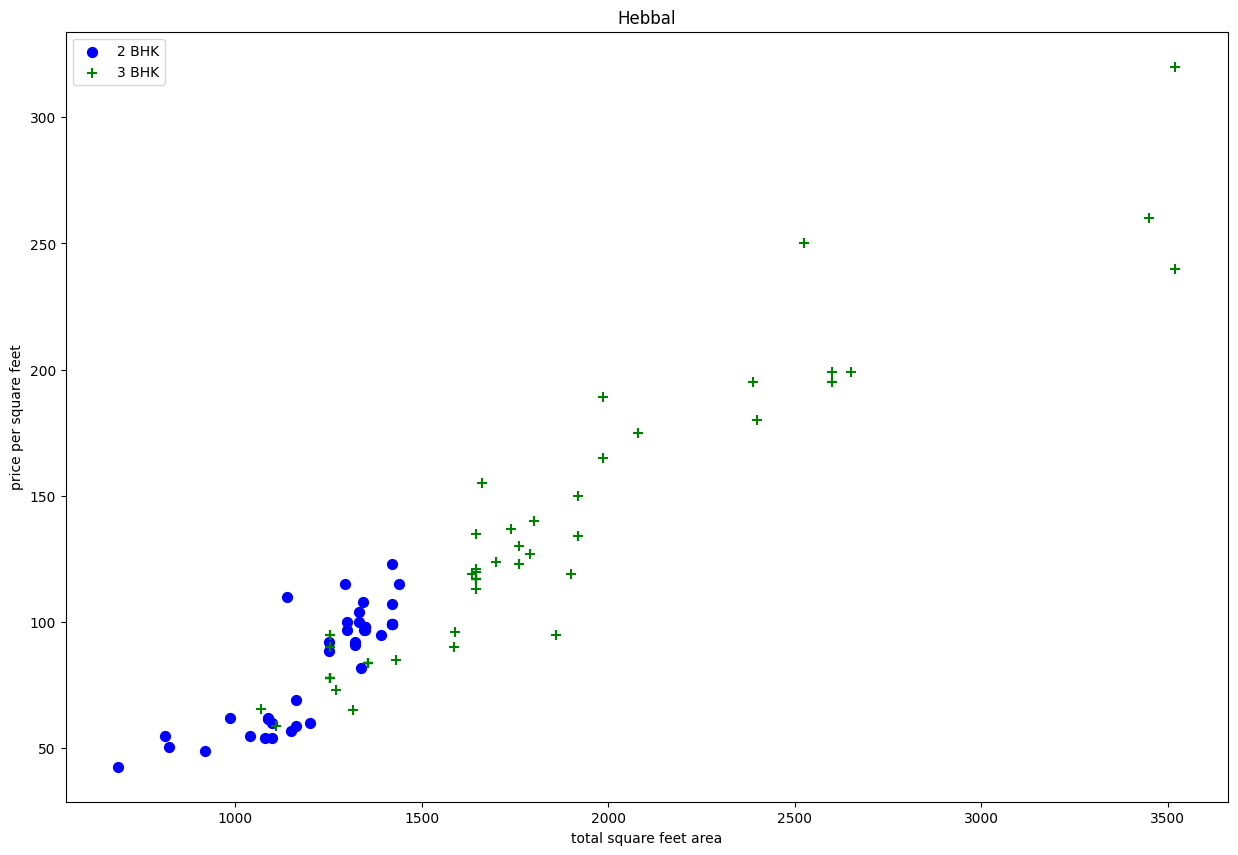

In [49]:
plot_scatter_chart(df8, "Hebbal")

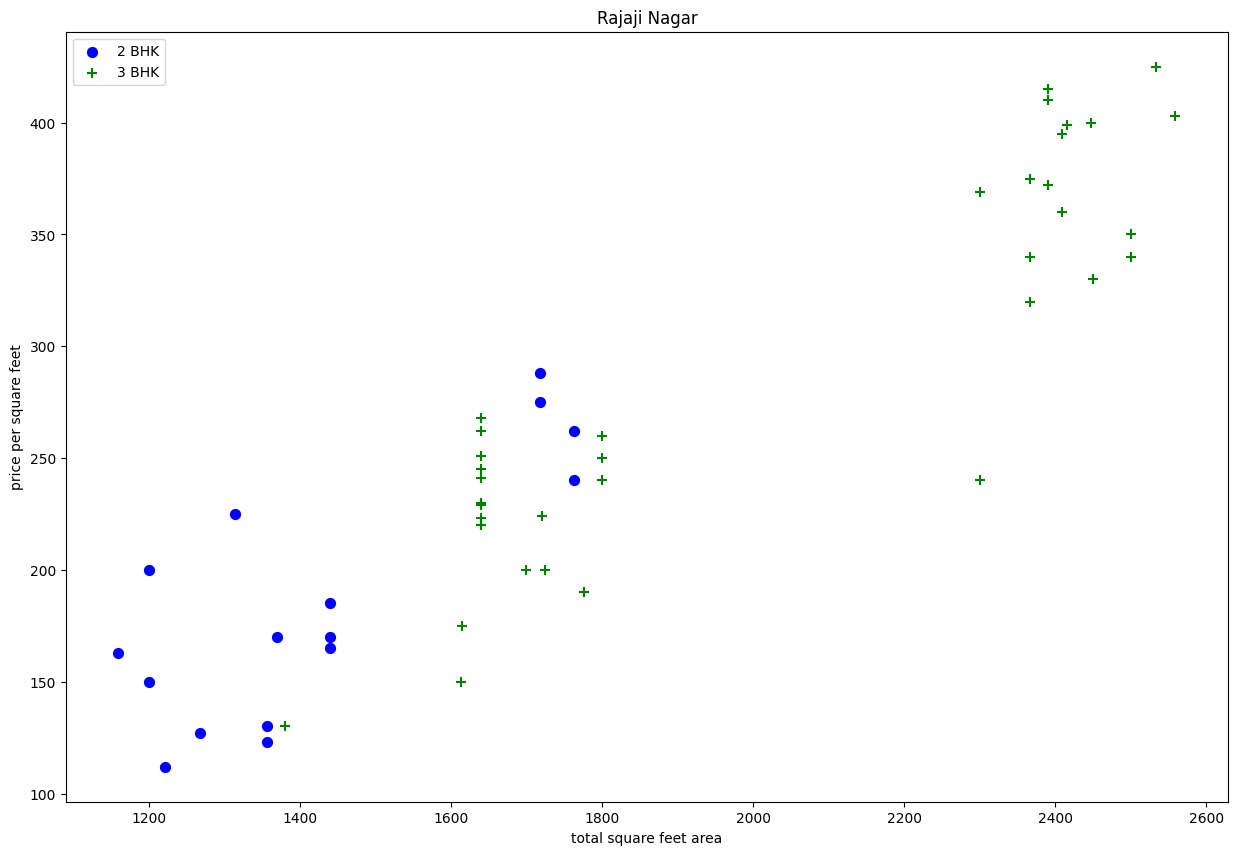

In [50]:
plot_scatter_chart(df8, "Rajaji Nagar")

In [51]:
## writing a function which will remove the price based on bhk outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [52]:
## creating a dataset avoid of price based on bhk outliers
df9 = remove_bhk_outliers(df8)
df9.shape

(7070, 8)

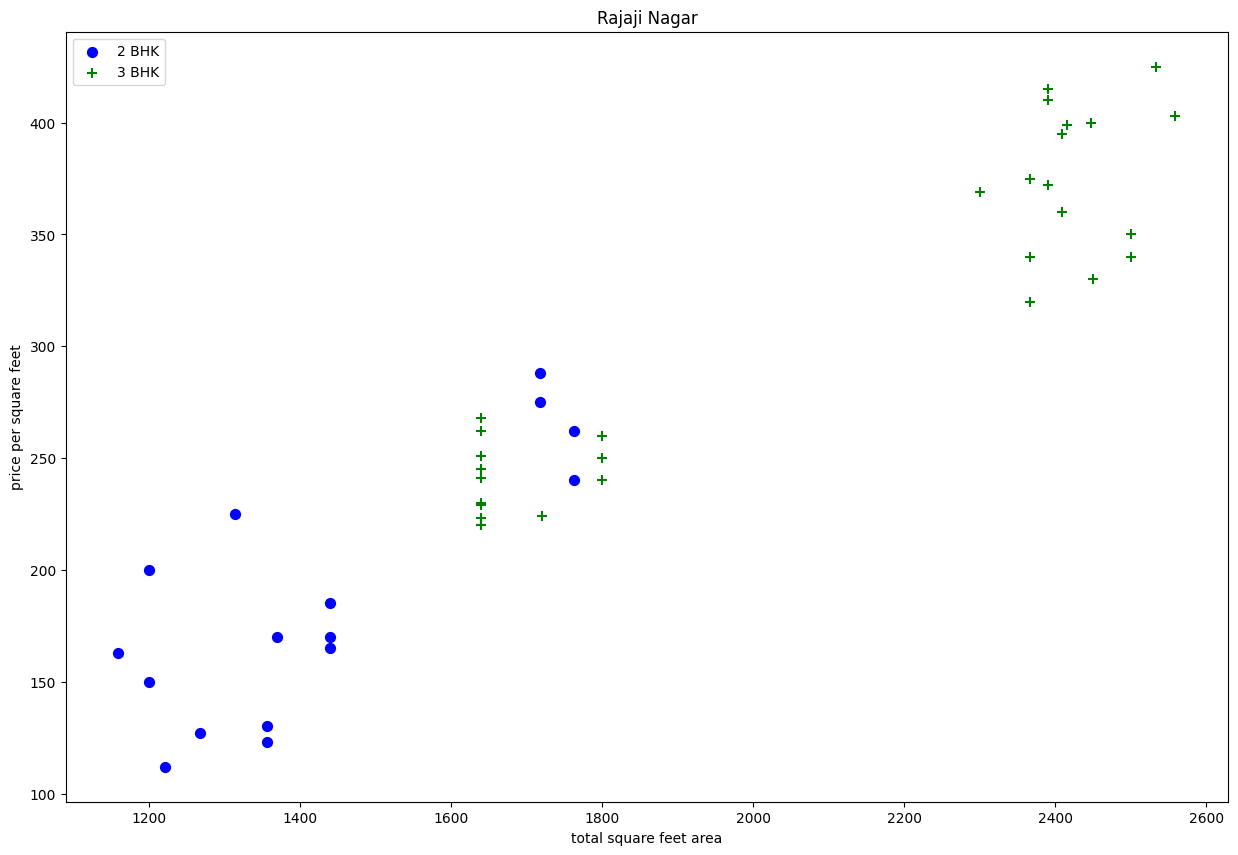

In [53]:
plot_scatter_chart(df9, "Rajaji Nagar")

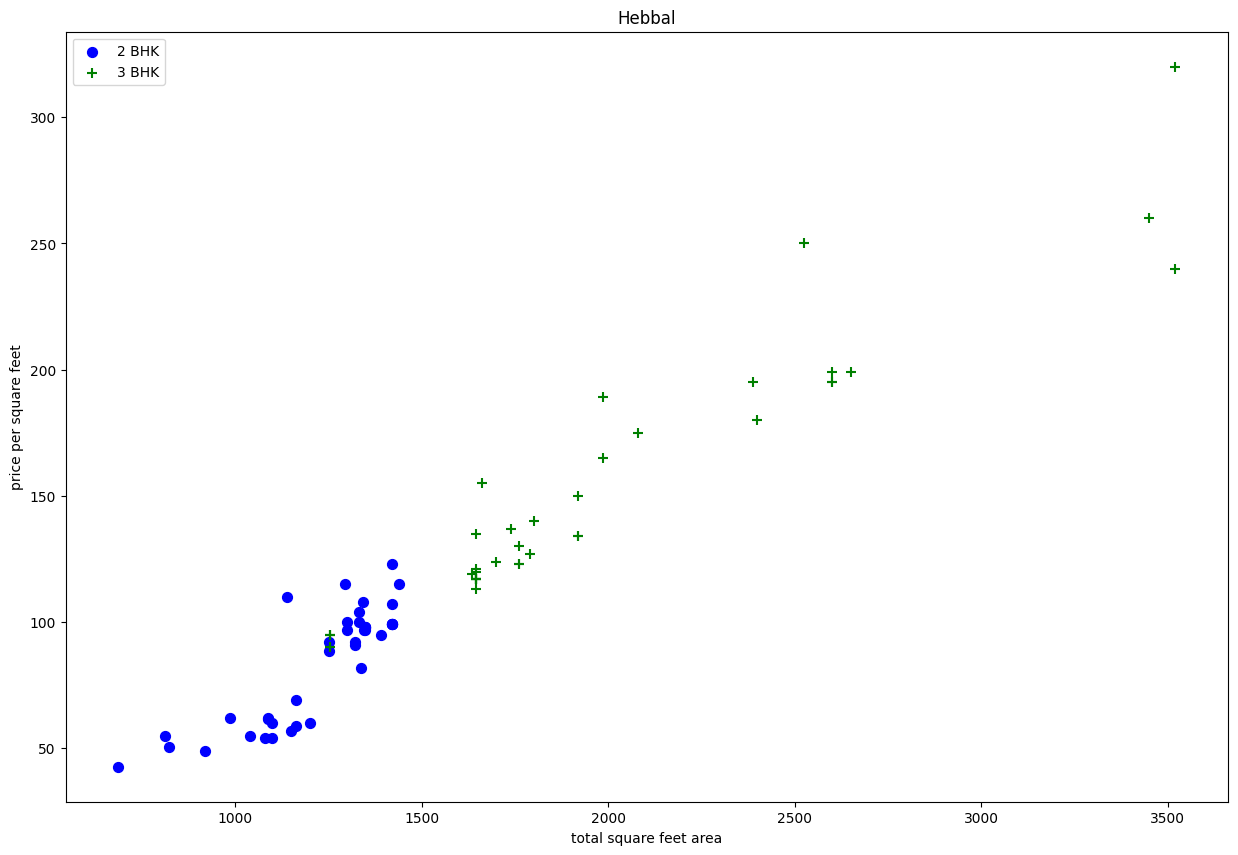

In [54]:
plot_scatter_chart(df9, "Hebbal")

Text(0, 0.5, 'count')

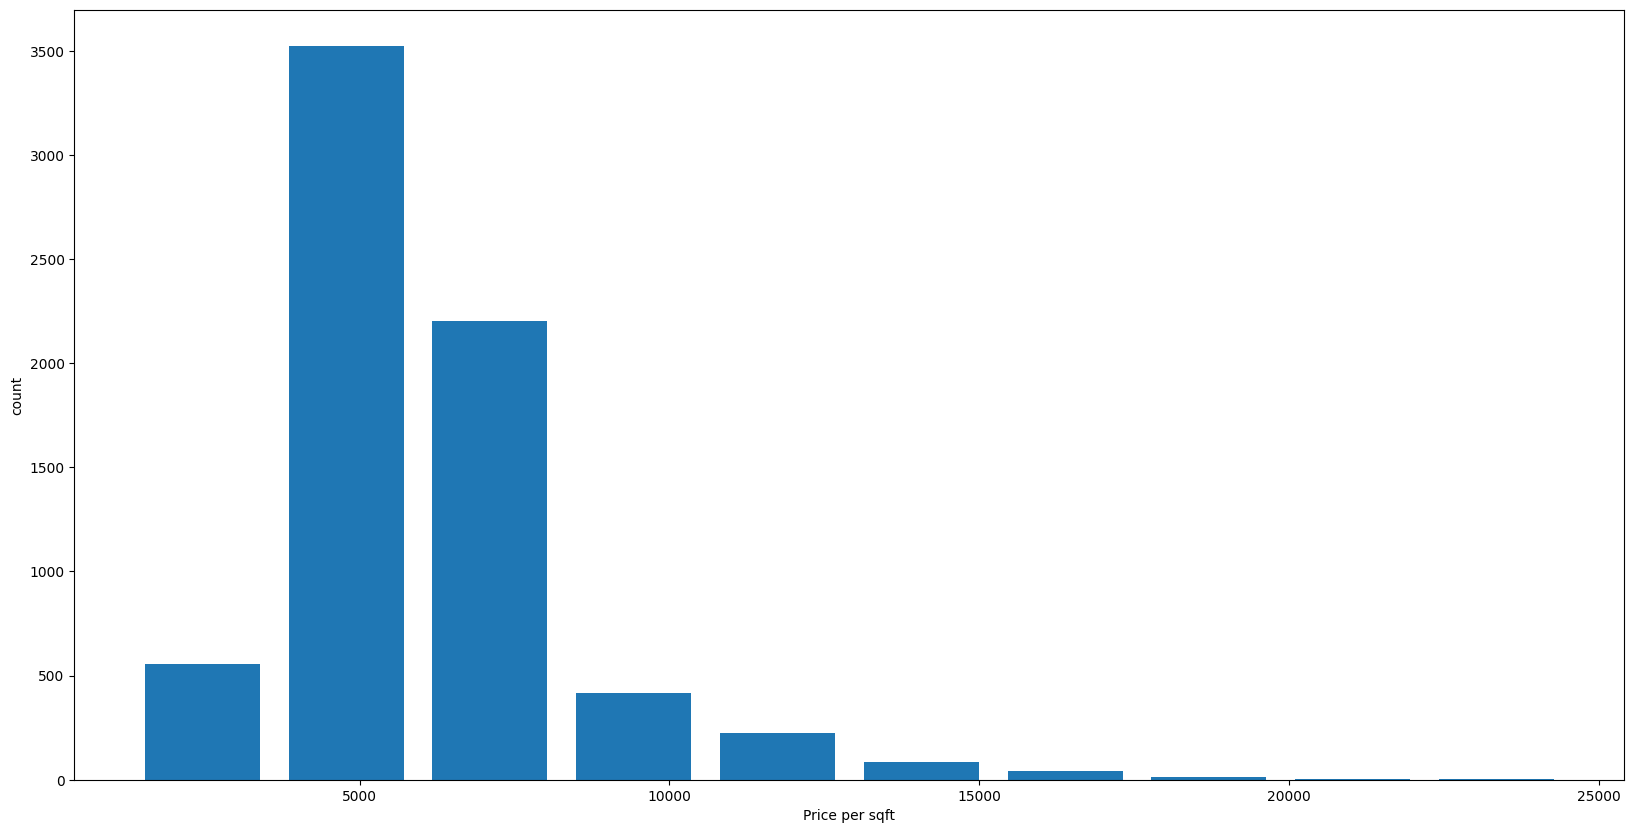

In [55]:
## so we can see that the outliers of these 2 graphs are less than the above 2 graphs
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df9.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per sqft')
plt.ylabel('count')

In [56]:
df9.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

In [57]:
df9[df9.bath>10]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
9267,other,5425.0,13.0,0.0,275.0,13,5069.124424,417.307692


Text(0, 0.5, 'count')

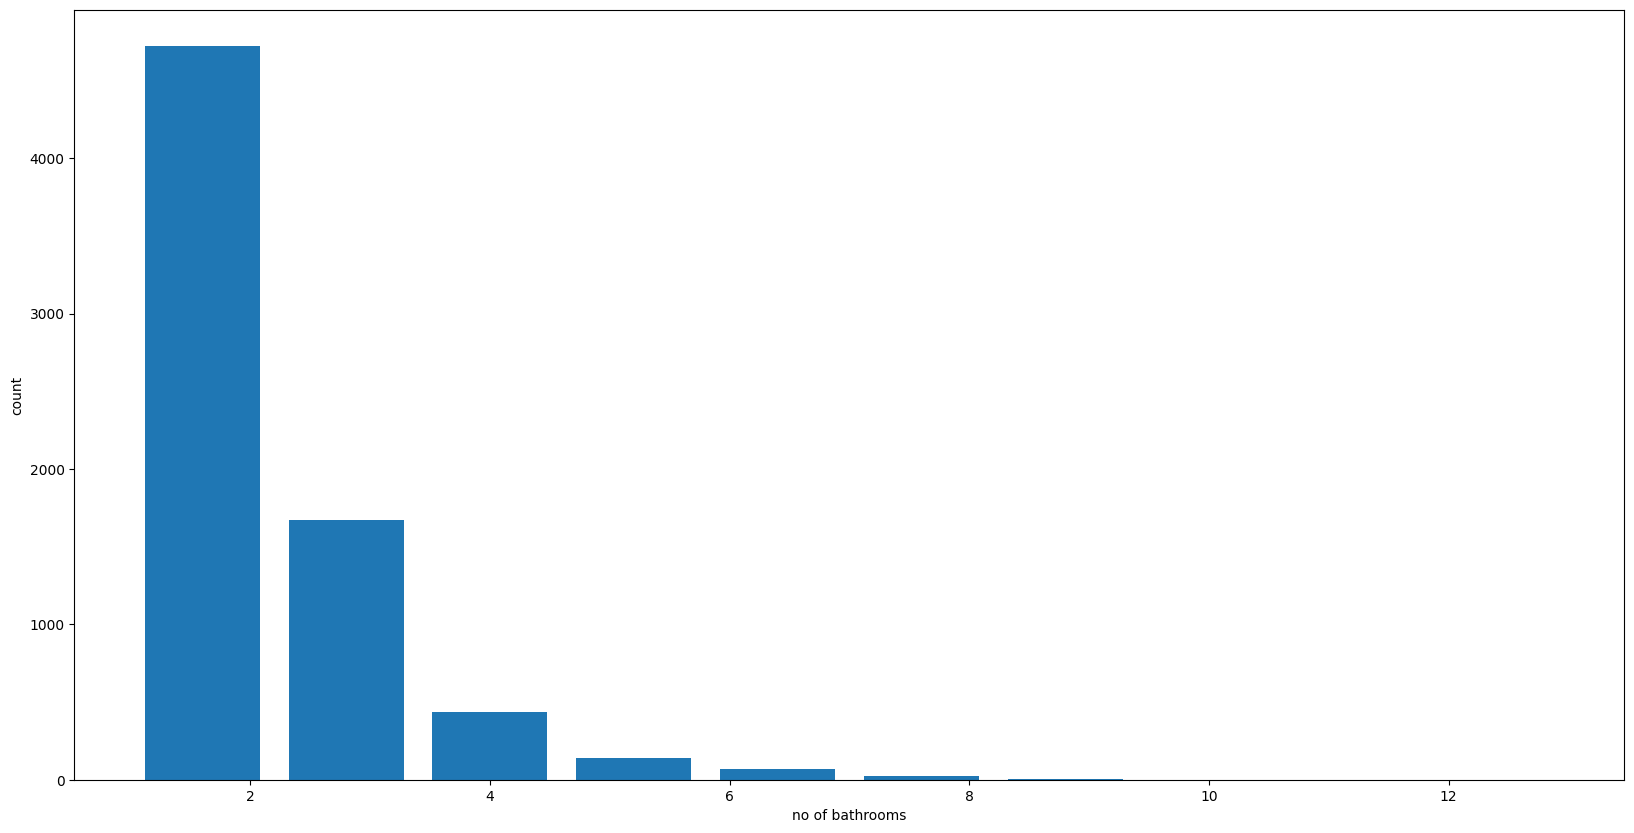

In [58]:
plt.hist(df9.bath, rwidth=0.8)
plt.xlabel('no of bathrooms')
plt.ylabel('count')

In [59]:
## finding out the dataset where there are abnormal number of bathrooms (2 more than the number of bedrooms)
df9[df9.bath>df9.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bedroom
1565,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520,615.000000
6500,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330,602.000000
8129,other,11338.0,9.0,1.0,1000.0,6,8819.897689,1889.666667


In [60]:
## dataset avoid of data rows containing the abnormal number of bathrooms
df10 = df9[df9.bath<df9.bhk+2]
df10.shape

(7003, 8)

In [61]:
df11 = df10.drop(['price_per_sqft'], axis='columns')
df11.head()

,location,total_sqft,bath,balcony,price,bhk,sqft_per_bedroom
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,625.0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,600.0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,585.0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,475.0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,473.5


In [62]:
df11

,location,total_sqft,bath,balcony,price,bhk,sqft_per_bedroom
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,625.0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,600.0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,585.0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,475.0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,473.5
...,...,...,...,...,...,...,...
9818,other,1155.0,2.0,1.0,64.0,2,577.5
9820,other,1200.0,2.0,3.0,70.0,2,600.0
9821,other,1800.0,1.0,1.0,200.0,1,1800.0
9824,other,1353.0,2.0,2.0,110.0,2,676.5


In [63]:
## now we know that ML model cannot understand text data. so we have to convert location to a numeric value.
## one way to do that is called one hot encoding which is also known as dummies
## we are going to use pandas dummies method

In [64]:
##creating the dummies
dummies = pd.get_dummies(df11['location'])

In [65]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
## incorporating the dummies into the original dataset and dropping the 'other' column as it has no importance for model
df12 = pd.concat([df11, dummies.drop(['other'], axis='columns')], axis='columns')

In [67]:
df12

,location,total_sqft,bath,balcony,price,bhk,sqft_per_bedroom,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,625.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,600.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,585.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,475.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,473.5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9818,other,1155.0,2.0,1.0,64.0,2,577.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9820,other,1200.0,2.0,3.0,70.0,2,600.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9821,other,1800.0,1.0,1.0,200.0,1,1800.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9824,other,1353.0,2.0,2.0,110.0,2,676.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df12.shape

(7003, 254)

In [69]:
## dropping the location as dummies are already made and ml model can't read text
df13 = df12.drop(['location'],axis='columns')

In [70]:
df13.shape

(7003, 253)

In [71]:
## creating the dependent variable
X= df13.drop(['price'],axis='columns')

In [72]:
X

,total_sqft,bath,balcony,bhk,sqft_per_bedroom,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,2,625.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,2,600.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,2,585.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,3,475.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,2,473.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9818,1155.0,2.0,1.0,2,577.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9820,1200.0,2.0,3.0,2,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9821,1800.0,1.0,1.0,1,1800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9824,1353.0,2.0,2.0,2,676.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
## creating the independent variable
y = df13['price']

In [74]:
y

1        40.0
2        83.0
3        40.0
4        65.0
5        43.0
        ...  
9818     64.0
9820     70.0
9821    200.0
9824    110.0
9825     26.0
Name: price, Length: 7003, dtype: float64

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
## creating train data and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
Regression= LinearRegression()

In [79]:
## running the linear regression model on test data and then evaluating the model based on the test data
Regression.fit(X_train, y_train)
Regression.score(X_test, y_test)

0.8633757654203333

In [80]:
## so the above output gives the accuracy of the model. but we will try to see different results of accuracy using 
## different randomized train and test samples. we will do it by help of k-fold cross validation

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,y, cv=cv)

array([0.8662392 , 0.85753502, 0.88370264, 0.78725344, 0.87380931])

In [82]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return Regression.predict([x])[0]

In [83]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Python 310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


170.95515924732365

In [84]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Python 310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


264.8513883544069

In [85]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(Regression,f)

In [86]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))